In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [166]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = './write/mousetraj.h5ad'
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')  # low dpi (dots per inch) yields small inline figures

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.5
scanpy      1.8.2
sinfo       0.3.4
-----
PIL                         8.4.0
attr                        21.2.0
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
cffi                        1.15.0
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.0
defusedxml                  0.7.1
entrypoints                 0.3
fontTools      

In [167]:
adata = sc.read_h5ad('./write/MouseData_wilcoxon.h5ad')

In [168]:
adata

AnnData object with n_obs × n_vars = 4362 × 3311
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [169]:
adata.X = adata.X.astype('float64')  # this is not required and results will be comparable without it

In [170]:
adata

AnnData object with n_obs × n_vars = 4362 × 3311
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [171]:
adata.X

array([[-0.0705313161, -0.1292778999, -0.1442104876, ...,  0.6027441621,
        -1.1528105736, -0.0669111907],
       [-0.0754928887, -0.1306479126, -0.1468053609, ...,  1.0030596256,
        -1.060308814 , -0.0658173636],
       [ 0.2732490897,  0.5583424568, -0.223518461 , ...,  0.5370218158,
        -0.2785222232, -0.2809343338],
       ...,
       [-0.0788357109, -0.1452018321,  1.5414013863, ..., -0.3317200243,
         0.3725710809, -0.0882484391],
       [-0.1141607091,  0.4638344646, -0.2694728076, ...,  0.2381681502,
        -0.3726553619,  0.4271863103],
       [-0.080151476 , -0.142578572 , -0.1555639058, ..., -0.2792209089,
         0.1988600194, -0.0828821734]])

In [172]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9937558  0.9925381  0.9902554  0.9892267  0.9883349
     0.98672956 0.97868645 0.97747624 0.9735108  0.96721697 0.96577024
     0.9653981  0.9641739  0.9600028 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [173]:
adata

AnnData object with n_obs × n_vars = 4362 × 3311
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'diffmap_evals'
    obsm: 'X_pca', 'X_umap', 'X_diffmap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [174]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50


/home/chiara/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


    finished (0:00:04)


computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:43)


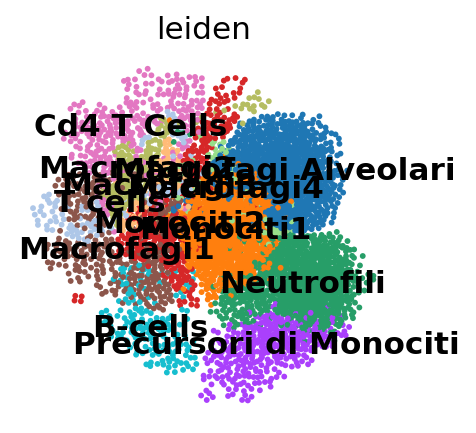

In [175]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color='leiden', legend_loc='on data')

In [176]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         0.9985996  0.997351   0.9971483  0.99627614
     0.995428   0.9943224  0.9934136  0.9927774  0.98988664 0.9893987
     0.98904765 0.98867065 0.9875354 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:43)


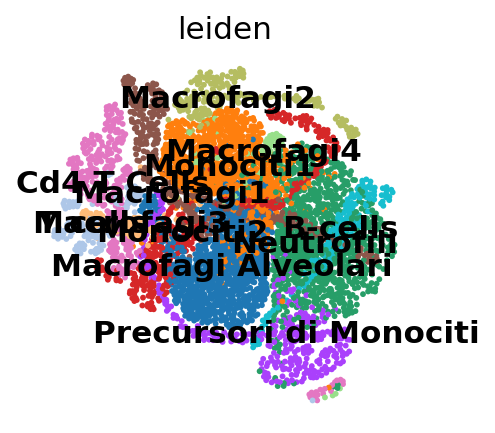

In [177]:
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color='leiden', legend_loc='on data')

In [178]:
sc.tl.paga(adata, groups='leiden')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


Usano louvain ma sarebbe meglio usare leiden\
Dopo di che vengono annotati i cluster usando i geni marker.
- Precursori di Monociti; Ifitm6, Retnlg, Lcn2
- Neutrofili;
- Monociti;
- Macrofagi; 
- Macrofagi Alveolari; Clec4n, 
- T cells;	Tmsb4x
- B cells; Ighm
Cambiamo notazione perché troppo confusa 

In [179]:
new_cluster_names_w = [
    'MAlv','Mono1','Neu','Mono2','0','M1','T1','M2','B-cells','T2', 'M3','M4']
adata.rename_categories('leiden', new_cluster_names_w)

/home/chiara/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


--> added 'pos', the PAGA positions (adata.uns['paga'])


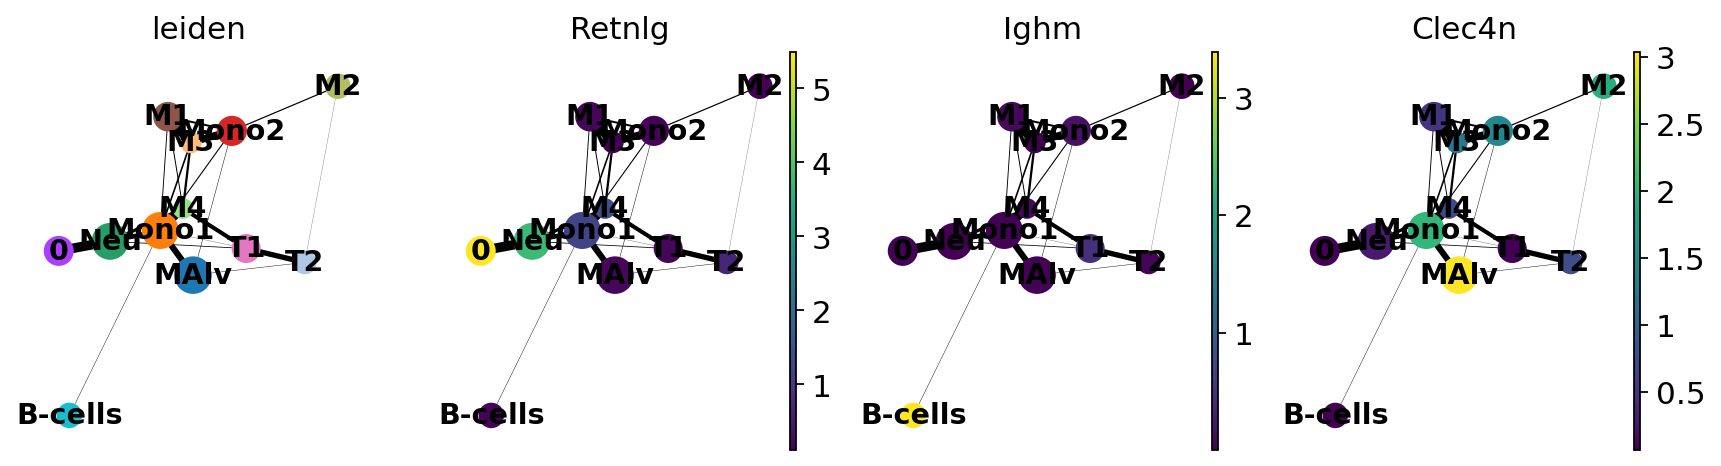

In [180]:
sc.pl.paga(adata, color=['leiden', 'Retnlg', 'Ighm', 'Clec4n'])

--> added 'pos', the PAGA positions (adata.uns['paga'])


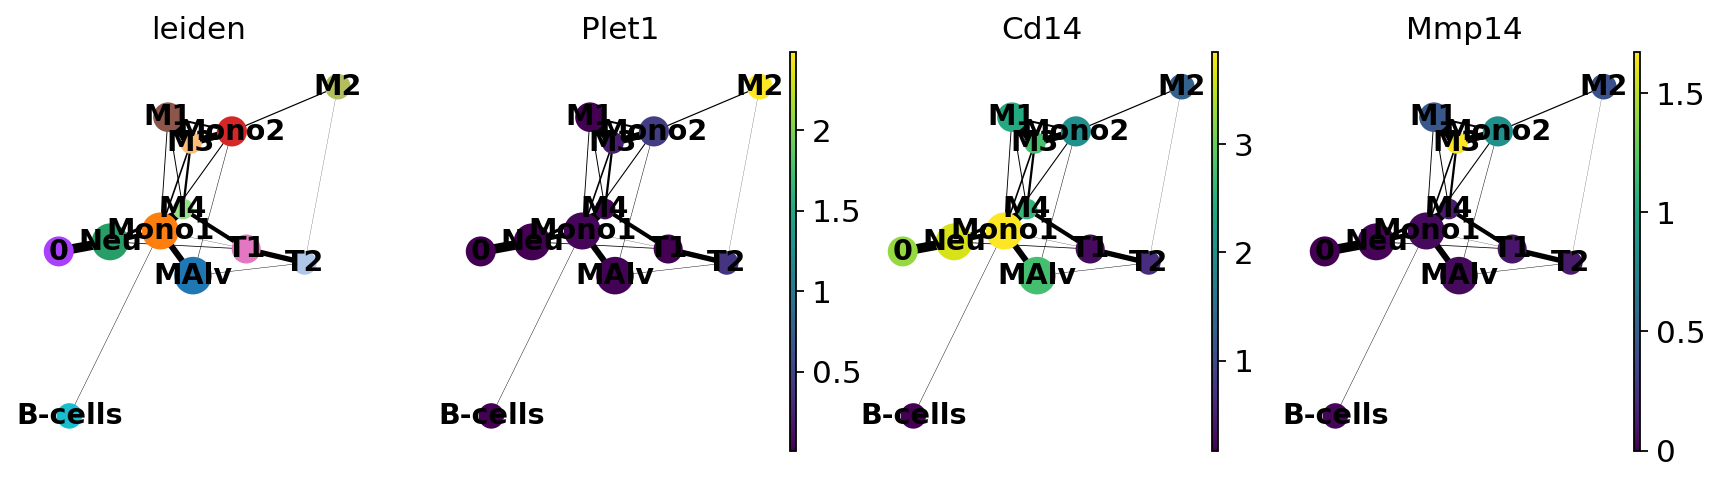

In [181]:
sc.pl.paga(adata, color=['leiden', 'Plet1', 'Cd14', 'Mmp14'])

--> added 'pos', the PAGA positions (adata.uns['paga'])


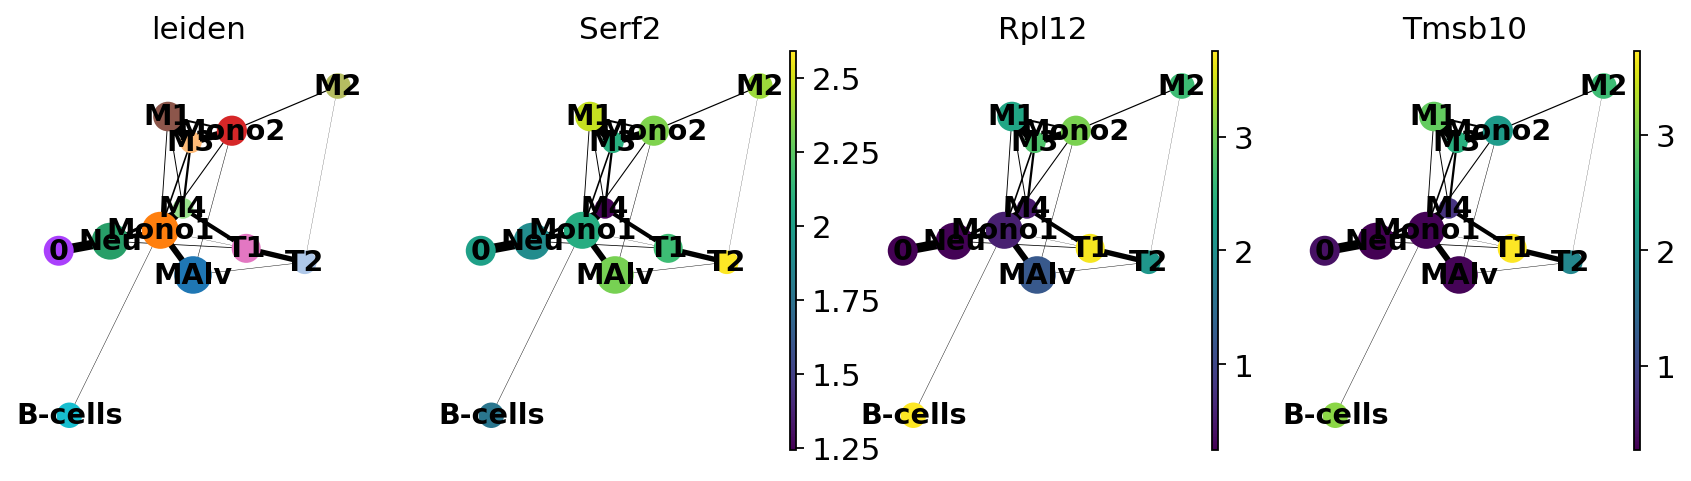

In [182]:
sc.pl.paga(adata, color=['leiden', 'Serf2', 'Rpl12', 'Tmsb10'])

- 0 - Precursori [4]
- 1/Neu - Neutrofili [2]
- 2 - Monociti [1]
- 3 - Macrofagi [11]
- 4 - Macrofagi [10]
- 5 - Macrofagi [5]
- 6/Mono - Monociti [3]
- 7/Macro - Macrofagi [7]
- 8/MAlv - Macrofagi Alveolari [0]
- 9 - Tcells [6]
- 10/Tcells - Tcells [9]
- 11/Bcells - B Cells [8]

--> added 'pos', the PAGA positions (adata.uns['paga'])


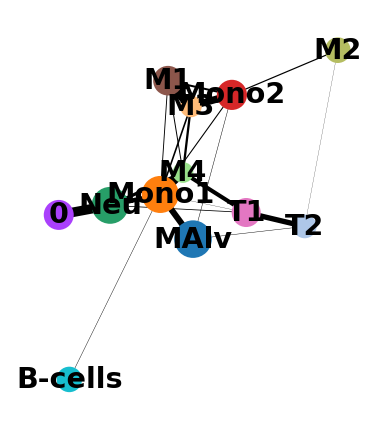

In [183]:
sc.pl.paga(adata, color='leiden')

In [184]:
adata.obs['leiden'].cat.categories
adata.obs['leiden_anno'] = adata.obs['leiden']
adata.obs['leiden_anno'].cat.categories = ['8/MAlv','2','1/Neu','6/Mono','0','5','9','7/Macro','11/Bcells','10/TCells', '4','3']

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


<Axes:>

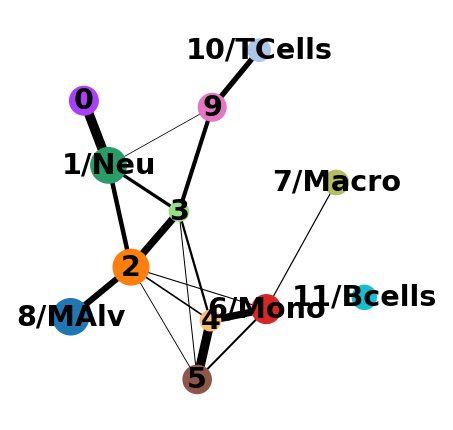

In [185]:
sc.tl.paga(adata, groups='leiden_anno')
sc.pl.paga(adata, threshold=0.03, show=False)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:33)


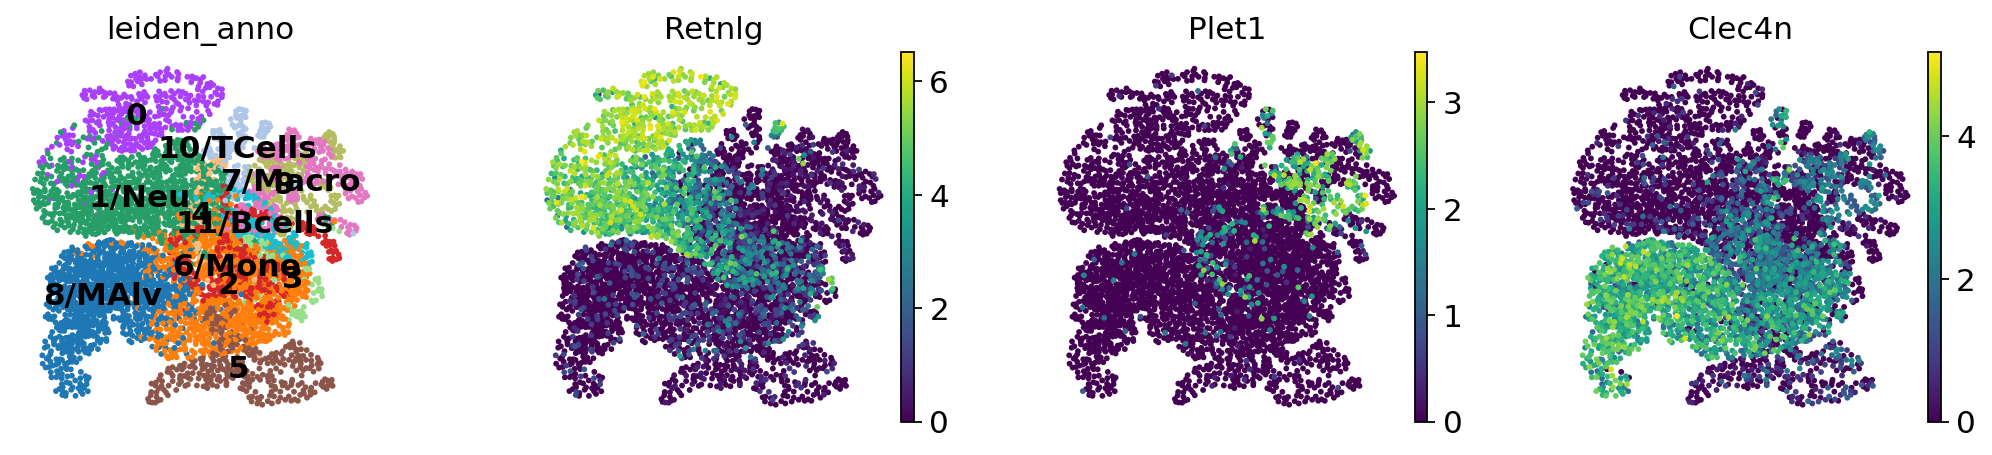

In [186]:
sc.tl.draw_graph(adata, init_pos='paga')
sc.pl.draw_graph(adata, color=['leiden_anno', 'Retnlg', 'Plet1', 'Clec4n'], legend_loc='on data')

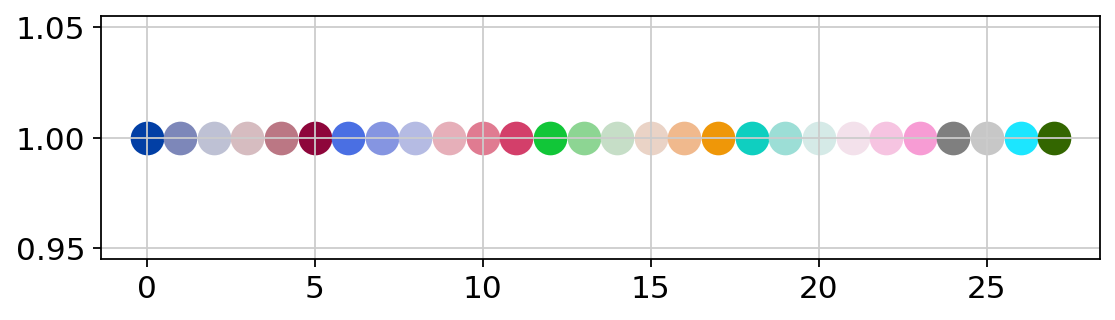

In [187]:
pl.figure(figsize=(8, 2))
for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
pl.show()

In [188]:
zeileis_colors = np.array(sc.pl.palettes.zeileis_28)
new_colors = np.array(adata.uns['leiden_anno_colors'])

In [189]:
new_colors[[4]] = zeileis_colors[[12]]  # Precursori / green
new_colors[[1, 3]] = zeileis_colors[[9, 10]]  # Monociti / red
new_colors[[6,9]] = zeileis_colors[[17, 16]]  # T cells / yellow
new_colors[[2]] = zeileis_colors[[18]]  # Neutrofili / turquoise
new_colors[[11, 10, 5, 7]] = zeileis_colors[[22, 22, 22, 11]]  # Macrofagi / light blue
new_colors[[0]] = zeileis_colors[[0]]  # Macrofagi Alveolari/ dark blue
new_colors[[8]] = zeileis_colors[[25]]  # outliers / grey
adata.uns['leiden_anno_colors'] = new_colors

- 0 - Precursori [4]
- 1/Neu - Neutrofili [2]
- 2 - Monociti [1]
- 3 - Macrofagi [11]
- 4 - Macrofagi [10]
- 5 - Macrofagi [5]
- 6/Mono - Monociti [3]
- 7/Macro - Macrofagi [7]
- 8/MAlv - Macrofagi Alveolari [0]
- 9 - Tcells [6]
- 10/Tcells - Tcells [9]
- 11/Bcells - B Cells [8]

--> added 'pos', the PAGA positions (adata.uns['paga'])


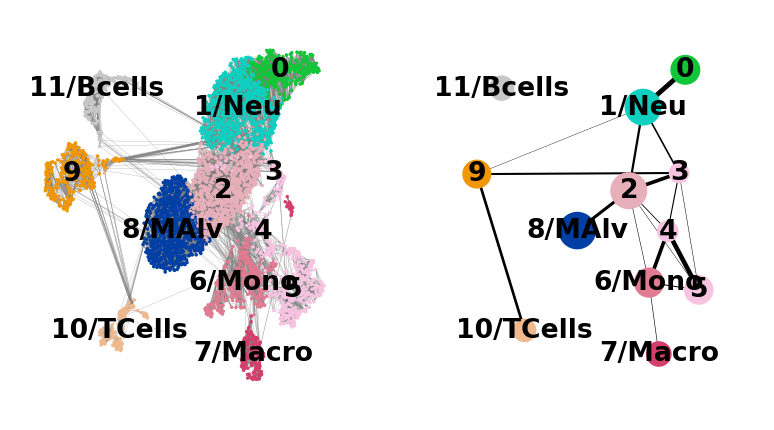

In [190]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True, save=True)

In [202]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == '0')[4]
sc.tl.dpt(adata)
gene_names = ['Rps15a', 'Rpl12', 'Tmsb10',                  # t cells
              'Clec4n', 'Ccrl2',                           # macrofagi alveolari
              'Cd14', 'Csf1r', 'Ctss']                     # macrofagi / monociti

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


- 0 - Precursori [4]
- 1/Neu - Neutrofili [2]
- 2 - Monociti [1]
- 3 - Macrofagi [11]
- 4 - Macrofagi [10]
- 5 - Macrofagi [5]
- 6/Mono - Monociti [3]
- 7/Macro - Macrofagi [7]
- 8/MAlv - Macrofagi Alveolari [0]
- 9 - Tcells [6]
- 10/Tcells - Tcells [9]
- 11/Bcells - B Cells [8]

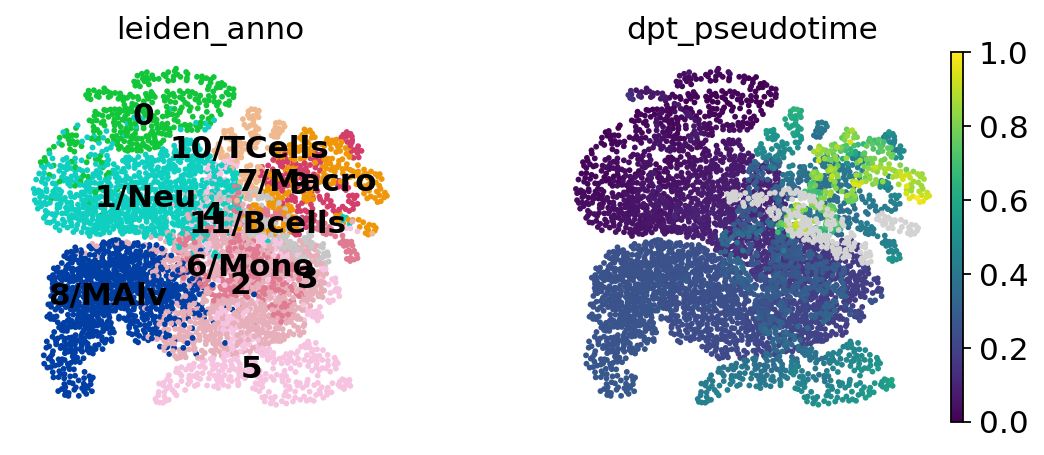

In [203]:
sc.pl.draw_graph(adata, color=['leiden_anno', 'dpt_pseudotime'], legend_loc='on data')

In [204]:
paths = [('t cells', [4, 2, 1, 11, 6 , 9]),
         ('alveo', [4, 2, 0]),
         ('mono_macro', [4, 2, 11, 10, 5, 3, 7])]
adata.obs['distance'] = adata.obs['dpt_pseudotime']
adata.obs['clusters'] = adata.obs['leiden_anno']  # just a cosmetic change
adata.uns['clusters_colors'] = adata.uns['leiden_anno_colors']

/home/chiara/anaconda3/envs/scan/lib/python3.8/site-packages/scanpy/_utils/__init__.py:434: RuntimeWarning: invalid value encountered in subtract
  ret[n:] = ret[n:] - ret[:-n]
/home/chiara/anaconda3/envs/scan/lib/python3.8/site-packages/scanpy/plotting/_tools/paga.py:1226: UserWarning: FixedFormatter should only be used together with FixedLocator
  groups_axis.set_yticklabels(['', xlabel, ''], fontsize=ytick_fontsize)
/home/chiara/anaconda3/envs/scan/lib/python3.8/site-packages/scanpy/plotting/_tools/paga.py:1273: UserWarning: FixedFormatter should only be used together with FixedLocator
  anno_axis.set_yticklabels(['', anno, ''], fontsize=ytick_fontsize)


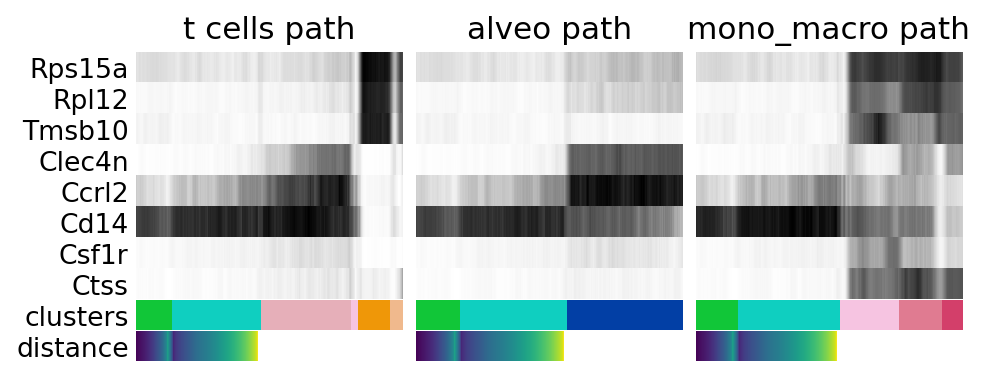

In [205]:
_, axs = pl.subplots(ncols=3, figsize=(6, 2.5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata, path, gene_names,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='clusters',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
    data.to_csv('./write/paga_path_{}.csv'.format(descr))
pl.savefig('./figures/paga_path_mouse.pdf')
pl.show()